In [25]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The primary goal was to reduce the number of contacts required while maximizing the success rate of subscriptions. This efficiency would help the bank better allocate its resources, such as phone agents' time and effort, and reduce operational costs.

### Data Source and Scope:
The dataset for this study was collected from 17 marketing campaigns conducted by the Portuguese bank between May 2008 and November 2010. The campaigns targeted potential clients to promote a long-term deposit product with attractive interest rates. The campaigns involved 79,354 contacts, with 6,499 successful subscriptions (~8% success rate). These campaigns primarily used telephone calls as the medium, sometimes supplemented with information provided through online banking channels.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [28]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [29]:
from utils.data_understanding_helpers import analyze_missing_values


analyze_missing_values(df)



Missing Values Analysis:
+----------------+------------+------------+
| Feature        |   #Missing | %Missing   |
+================+============+============+
| age            |          0 | 0.00%      |
+----------------+------------+------------+
| job            |          0 | 0.00%      |
+----------------+------------+------------+
| marital        |          0 | 0.00%      |
+----------------+------------+------------+
| education      |          0 | 0.00%      |
+----------------+------------+------------+
| default        |          0 | 0.00%      |
+----------------+------------+------------+
| housing        |          0 | 0.00%      |
+----------------+------------+------------+
| loan           |          0 | 0.00%      |
+----------------+------------+------------+
| contact        |          0 | 0.00%      |
+----------------+------------+------------+
| month          |          0 | 0.00%      |
+----------------+------------+------------+
| day_of_week    |          0

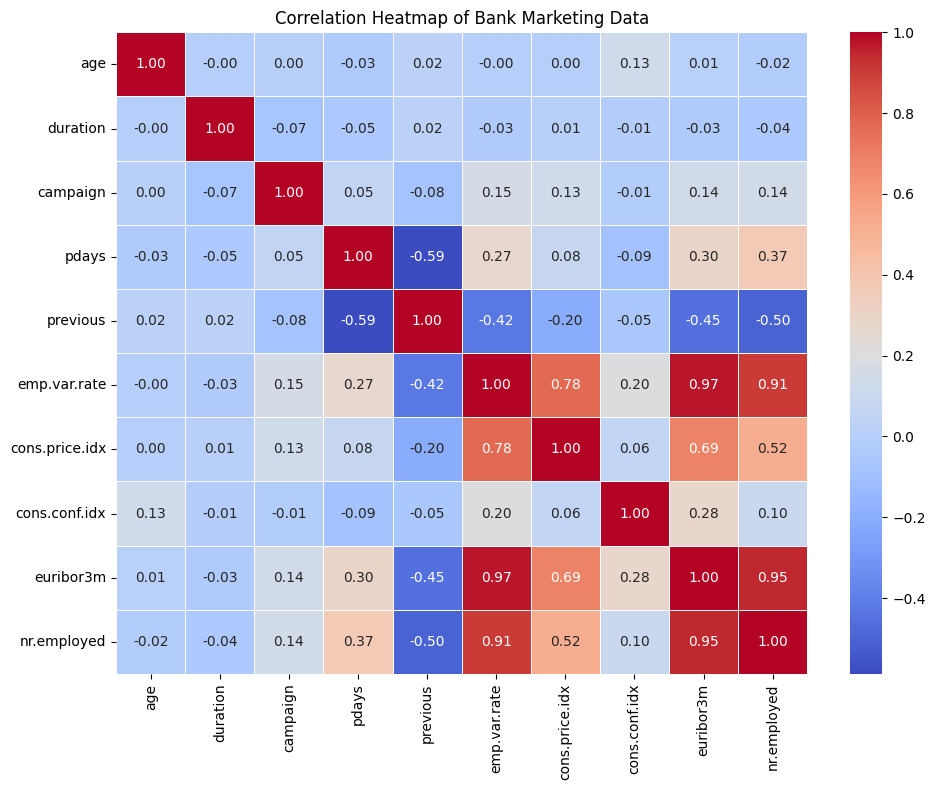

In [30]:
from utils.data_understanding_helpers import plot_correlation_matrix

plot_correlation_matrix(df, 'Bank Marketing Data')


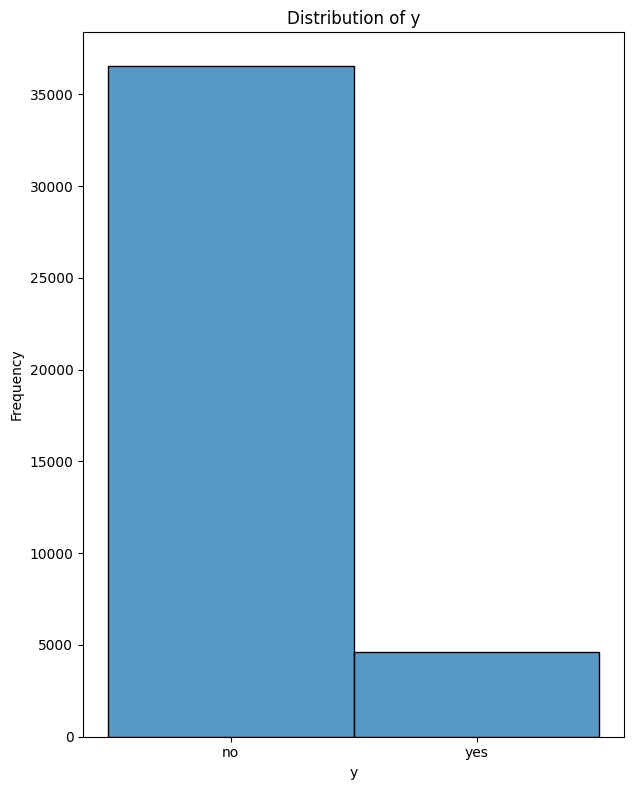

In [31]:
from utils.data_understanding_helpers import plot_histograms
#Plot histograms for target variable y
plot_histograms(df['y'], kde=False)


| **Feature**            | **Current Type**     | **Description** | **Action** |
|------------------------|----------------------|----------------|--------------------|
| **age**                | Numeric              | Age of the client in years | **Scale**   |
| **job**                | Categorical          | Type of job (e.g., admin, technician) | Handle `'unknown'` as missing or a separate category; **One-hot encode**. |
| **marital**            | Categorical          | Marital status of the client | Handle `'unknown'` as missing or a separate category; **One-hot encode**. |
| **education**          | Categorical          | Client’s education level | Handle `'unknown'` as missing or a separate category; **One-hot encode**. |
| **default**            | Categorical          | Whether the client has credit in default | Handle `'unknown'` as missing or a separate category; **One-hot encode**. |
| **housing**            | Categorical          | Whether the client has a housing loan | Handle `'unknown'` as missing or a separate category; **One-hot encode**. |
| **loan**               | Categorical          | Whether the client has a personal loan | Handle `'unknown'` as missing or a separate category; **One-hot encode**. |
| **contact**            | Categorical          | Type of contact communication (cellular or telephone) | **One-hot encode**. |
| **month**              | Categorical          | Last contact month of the year | Convert to **ordinal encode** (Jan = 1,  Feb = 2, etc.). |
| **day_of_week**        | Categorical          | Day of the week when contact was made |  **ordinal encode** (Mon = 1, Tue = 2, etc.). |
| **duration**           | Numeric              | Duration of the last contact (in seconds) | Drop because value would not be known before the call meaning it can't be used to predict the target |
| **campaign**           | Numeric              | Number of contacts during this campaign | **Scale** |
| **pdays**              | Numeric              | Days since last contact (999 means no prior contact) | **Scale** |
| **previous**           | Numeric              | Number of contacts before this campaign | **Scale** |
| **poutcome**           | Categorical          | Outcome of the previous campaign (failure, success, nonexistent) | **One-hot encode**. |
| **emp.var.rate**       | Numeric              | Employment variation rate (quarterly) | **Scale**, Also consider removing because it has a high correlation with `euribor3m` to avoid multicollinearity |
| **cons.price.idx**     | Numeric              | Consumer price index (monthly) | **Scale** |
| **cons.conf.idx**      | Numeric              | Consumer confidence index (monthly) | **Scale** |
| **euribor3m**          | Numeric              | 3-month Euribor rate (daily) | **Scale** |
| **nr.employed**        | Numeric              | Number of employees (quarterly) | **Scale** |
| **y (target)**         | Categorical (Binary) | Whether the client subscribed to the term deposit (yes/no) | **Encode as binary (0 = 'no', 1 = 'yes')** for modeling. Balance the classes by undersampling or oversampling the majority class. |


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Business Objective**:  
The primary objective of this task is to **predict whether a bank client will subscribe to a term deposit** based on various client attributes, previous campaign interactions, and external economic indicators. By developing an accurate predictive model, the bank aims to:

1. **Increase campaign efficiency**: Reduce the number of unnecessary contacts while maintaining or increasing the subscription rate.
2. **Optimize resource allocation**: Efficiently manage the time and efforts of call agents by focusing on high-potential clients.
3. **Improve marketing effectiveness**: Identify key factors influencing client behavior to refine future campaigns and enhance targeting strategies.
4. **Minimize costs**: Avoid wasting resources on low-probability leads while maximizing returns from successful subscriptions.

The task involves **data preprocessing, feature selection, and predictive modeling** to build a classification model that can accurately predict the likelihood of a subscription (target variable: **`y`**). Insights from the model will help the bank in **decision-making** and **resource planning** for future marketing efforts.


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [33]:
#Drop duration
df_clean = df.drop(columns=['duration'])

#Encode target variable
df_y_encoded = df_clean.copy() #Make a copy of the dataframe to avoid modifying the original keeping actions idempotent
df_y_encoded['y'] = df_y_encoded['y'].map({'yes': 1, 'no': 0})

df_y_encoded.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Define Preprocessing Steps

# For numerical features, we'll apply StandardScaler
numerical_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
numerical_transformer = StandardScaler()


# For categorical features, we'll apply OneHotEncoder
categorical_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

#For ordinal features, we'll apply OrdinalEncoder
ordinal_features = ['education', 'month', 'day_of_week']
education_order = ['unknown','basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree']
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_of_week_order = ['mon', 'tue', 'wed', 'thu', 'fri']
ordinal_transformer = OrdinalEncoder(categories=[education_order, month_order, day_of_week_order])

# Create ColumnTransformer to apply transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ])


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [35]:
from sklearn.model_selection import train_test_split

#Split into target and features
X = df_y_encoded.drop(columns=['y'])
y = df_y_encoded['y']

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [81]:
#Train baseline model
from utils.data_modelling_helpers import train_baseline_model

#Trains a baseline model using a dummy classifier that predicts the most frequent class. This is a good baseline to beat.
baseline_model = train_baseline_model(X_train, y_train, model_type='classification', scoring='accuracy')



Training baseline Dummy Classifier model...


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [37]:
#Setup pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
simple_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('model', LogisticRegression()) #Placeholder for the model
])


In [38]:
from utils.data_modelling_helpers import ModelWrapper, evaluate_models, train_models

#
simple_logistic_regression_model = ModelWrapper(
    LogisticRegression(max_iter=1000), #Increase max_iter to avoid convergence warnings
    {}, 
    'Logistic Regression'
)

best_simple_logistic_regression_model = train_models(
    [simple_logistic_regression_model], 
    simple_pipeline, 
    X_train, 
    y_train, 
    cv=5, 
    model_type='classification', 
    scoring='accuracy')




### Problem 9: Score the Model

What is the accuracy of your model?

+----+-----------------------+------------+-------------+----------+------------+-------------------+---------------------------+----------------------------+
|    | Model Name            |   Accuracy |   Precision |   Recall |   F1 Score | Best Parameters   |   Training Time (seconds) |   Selection Time (seconds) |
+====+=======================+============+=============+==========+============+===================+===========================+============================+
|  0 | Logistic Regression * |   0.896941 |    0.876552 | 0.896941 |   0.873655 | {}                |                   1.68891 |                    4.81756 |
+----+-----------------------+------------+-------------+----------+------------+-------------------+---------------------------+----------------------------+


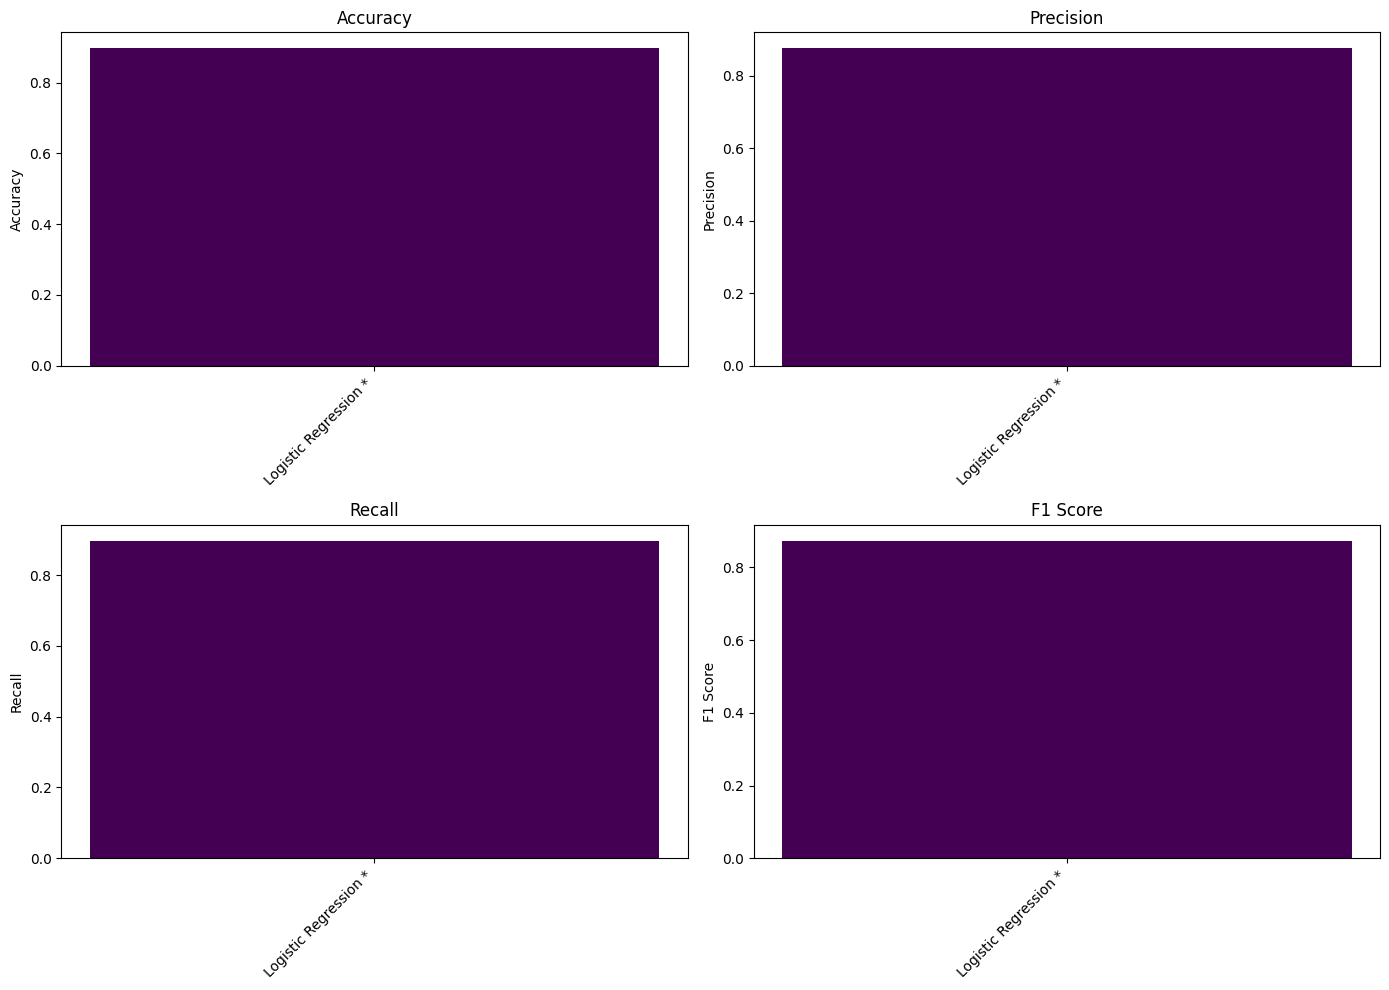

,Model Name,Accuracy,Precision,Recall,F1 Score,Best Parameters,Training Time (seconds),Selection Time (seconds)
0,Logistic Regression *,0.896941,0.876552,0.896941,0.873655,{},1.688909,4.817564


In [39]:
evaluate_models(best_simple_logistic_regression_model, X_test, y_test, model_type='classification', scoring='accuracy')

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

simple_knn_model = ModelWrapper(KNeighborsClassifier(), {}, 'KNN')
simple_decision_tree_model = ModelWrapper(DecisionTreeClassifier(), {}, 'Decision Tree')
simple_svm_model = ModelWrapper(SVC(), {}, 'SVM')

simple_models_list = [simple_logistic_regression_model, simple_knn_model, simple_decision_tree_model, simple_svm_model]





In [41]:
best_simple_models_results = train_models(
    simple_models_list, 
    simple_pipeline, 
    X_train, 
    y_train, 
    model_type='classification', 
    scoring='accuracy', 
    training_time=True,
    verbose=3
)


Training Logistic Regression model...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 4/5] END ..................................., score=0.902 total time=   0.5s
[CV 2/5] END ..................................., score=0.897 total time=   0.5s
[CV 3/5] END ..................................., score=0.899 total time=   0.6s
[CV 5/5] END ..................................., score=0.901 total time=   0.6s
[CV 1/5] END ..................................., score=0.903 total time=   0.4s
Training KNN model...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END ..................................., score=0.889 total time=   0.8s
[CV 4/5] END ..................................., score=0.892 total time=   0.8s
[CV 3/5] END ..................................., score=0.891 total time=   0.8s
[CV 5/5] END ..................................., score=0.893 total time=   0.8s
[CV 1/5] END ..................................., score=0.891 total time=   0.8s
Training Dec

+----+---------------------+------------+-------------+----------+----------+-------------------+---------------------------+----------------------------+
|    | Model Name          |   Accuracy |   Precision |   Recall |       F1 | Best Parameters   |   Training Time (seconds) |   Selection Time (seconds) |
+====+=====================+============+=============+==========+==========+===================+===========================+============================+
|  4 | SVM *               |   0.897669 |    0.878993 | 0.897669 | 0.871029 | {}                |               23.976      |                 48.8098    |
+----+---------------------+------------+-------------+----------+----------+-------------------+---------------------------+----------------------------+
|  1 | Logistic Regression |   0.896941 |    0.876552 | 0.896941 | 0.873655 | {}                |                2.18283    |                  3.00458   |
+----+---------------------+------------+-------------+----------+----

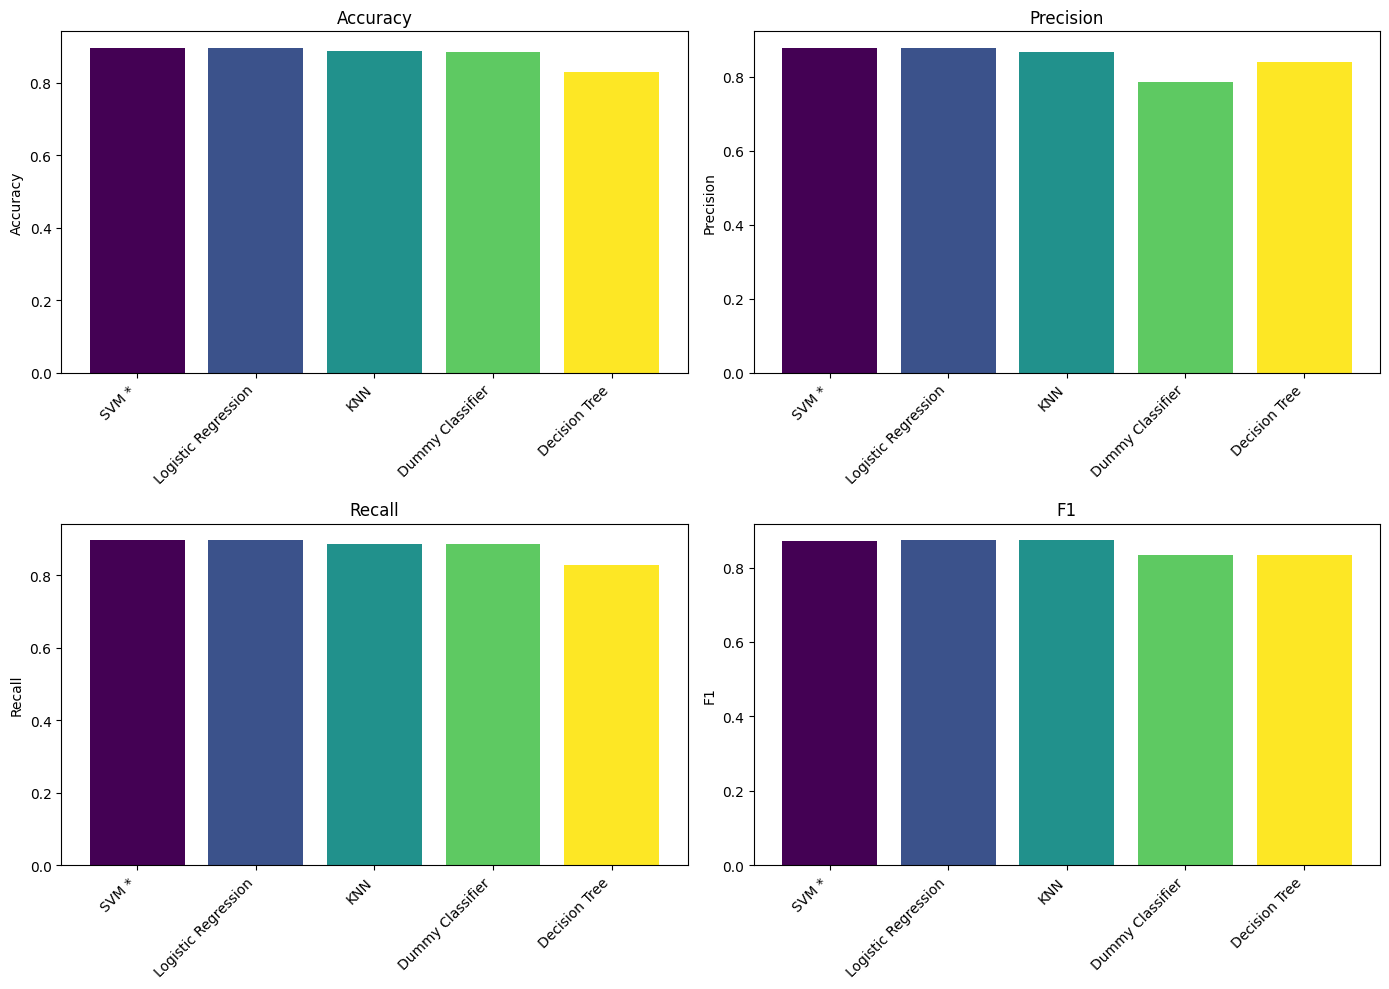

,Model Name,Accuracy,Precision,Recall,F1,Best Parameters,Training Time (seconds),Selection Time (seconds)
4,SVM *,0.897669,0.878993,0.897669,0.871029,{},23.976023,48.809815
1,Logistic Regression,0.896941,0.876552,0.896941,0.873655,{},2.182832,3.004580
2,KNN,0.887715,0.867385,0.887715,0.873253,{},0.042860,1.434641
0,Dummy Classifier,0.886502,0.785885,0.886502,0.833167,{},0.000621,0.033812
3,Decision Tree,0.830056,0.839103,0.830056,0.834407,{},0.182162,0.522608


In [83]:
evaluate_models(best_simple_models_results, X_test, y_test, model_type='classification', scoring='accuracy',  baseline_model=baseline_model)

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Experiment 1: Oversampling the minority class

In [48]:
#Balance the classes by oversampling the minority class
from imblearn.pipeline import Pipeline as imblearn_Pipeline 
from imblearn.over_sampling import SMOTE


simple_pipeline_oversampled = imblearn_Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('oversample', SMOTE(random_state=42)),
    ('model', LogisticRegression()) #Placeholder for the model
])

best_simple_models_results_oversampled = train_models(
    simple_models_list, 
    simple_pipeline_oversampled, 
    X_train, 
    y_train, 
    model_type='classification', 
    scoring='accuracy', 
    training_time=True,
)



Training Logistic Regression model...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.800 total time=   1.2s
[CV 3/5] END ..................................., score=0.796 total time=   1.2s
[CV 2/5] END ..................................., score=0.797 total time=   1.2s
[CV 5/5] END ..................................., score=0.792 total time=   1.1s
[CV 4/5] END ..................................., score=0.801 total time=   1.2s
Training KNN model...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 3/5] END ..................................., score=0.746 total time=   1.4s
[CV 2/5] END ..................................., score=0.744 total time=   1.4s
[CV 1/5] END ..................................., score=0.749 total time=   1.4s
[CV 5/5] END ..................................., score=0.747 total time=   1.4s
[CV 4/5] END ..................................., score=0.757 total time=   1.3s
Training Dec

+----+---------------------+------------+-------------+----------+----------+-------------------+---------------------------+----------------------------+
|    | Model Name          |   Accuracy |   Precision |   Recall |       F1 | Best Parameters   |   Training Time (seconds) |   Selection Time (seconds) |
+====+=====================+============+=============+==========+==========+===================+===========================+============================+
|  0 | Dummy Classifier *  |   0.886502 |    0.785885 | 0.886502 | 0.833167 | {}                |                0.00062108 |                  0.0338118 |
+----+---------------------+------------+-------------+----------+----------+-------------------+---------------------------+----------------------------+
|  3 | Decision Tree       |   0.832605 |    0.843361 | 0.832605 | 0.837723 | {}                |                0.490385   |                  1.09985   |
+----+---------------------+------------+-------------+----------+----

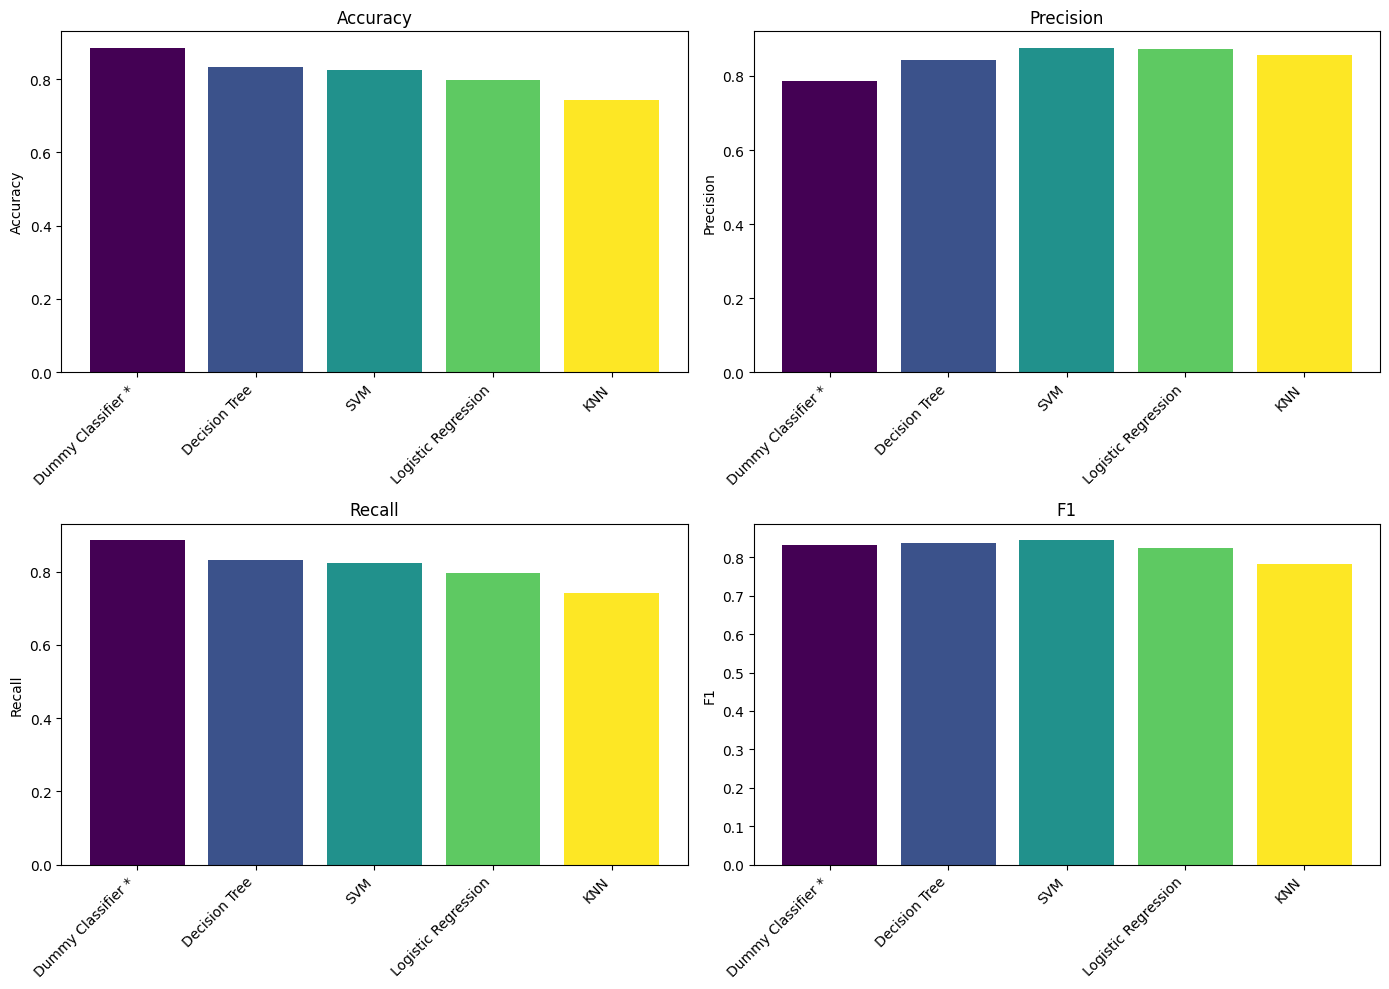

,Model Name,Accuracy,Precision,Recall,F1,Best Parameters,Training Time (seconds),Selection Time (seconds)
0,Dummy Classifier *,0.886502,0.785885,0.886502,0.833167,{},0.000621,0.033812
3,Decision Tree,0.832605,0.843361,0.832605,0.837723,{},0.490385,1.099847
4,SVM,0.825200,0.876751,0.825200,0.844787,{},86.095113,171.431198
1,Logistic Regression,0.796795,0.873440,0.796795,0.824578,{},3.079855,4.584243
2,KNN,0.742535,0.856466,0.742535,0.783409,{},0.089785,2.300658


In [84]:
evaluate_models(best_simple_models_results_oversampled, X_test, y_test, model_type='classification', scoring='accuracy', baseline_model=baseline_model)

##### Findings
- The accuracy of the models drop significantly when oversampling the minority class, out performed by Dummy Classifier.
- Not a viable solution to improve the model's performance.

#### Experiment 2: Undersampling the majority class

Balance the classes by undersampling the majority class

In [50]:
from imblearn.pipeline import Pipeline as imblearn_Pipeline 
from imblearn.under_sampling import RandomUnderSampler


simple_pipeline_undersampled = imblearn_Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('undersample', RandomUnderSampler(random_state=42)),
    ('model', LogisticRegression()) #Placeholder for the model
])

best_simple_models_results_undersampled = train_models(
    simple_models_list, 
    simple_pipeline_undersampled, 
    X_train, 
    y_train, 
    model_type='classification', 
    scoring='accuracy', 
    training_time=True,
    verbose=3
)


Training Logistic Regression model...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END ..................................., score=0.782 total time=   0.2s
[CV 4/5] END ..................................., score=0.797 total time=   0.2s
[CV 3/5] END ..................................., score=0.789 total time=   0.2s
[CV 5/5] END ..................................., score=0.786 total time=   0.2s
[CV 1/5] END ..................................., score=0.786 total time=   0.2s
Training KNN model...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.739 total time=   0.3s
[CV 5/5] END ..................................., score=0.731 total time=   0.3s
[CV 3/5] END ..................................., score=0.730 total time=   0.4s
[CV 4/5] END ..................................., score=0.742 total time=   0.3s
[CV 2/5] END ..................................., score=0.729 total time=   0.6s
Training Dec

+----+---------------------+------------+-------------+----------+----------+-------------------+---------------------------+----------------------------+
|    | Model Name          |   Accuracy |   Precision |   Recall |       F1 | Best Parameters   |   Training Time (seconds) |   Selection Time (seconds) |
+====+=====================+============+=============+==========+==========+===================+===========================+============================+
|  0 | Dummy Classifier *  |   0.886502 |    0.785885 | 0.886502 | 0.833167 | {}                |                0.00062108 |                  0.0338118 |
+----+---------------------+------------+-------------+----------+----------+-------------------+---------------------------+----------------------------+
|  4 | SVM                 |   0.7832   |    0.873516 | 0.7832   | 0.815078 | {}                |                1.56752    |                  4.29356   |
+----+---------------------+------------+-------------+----------+----

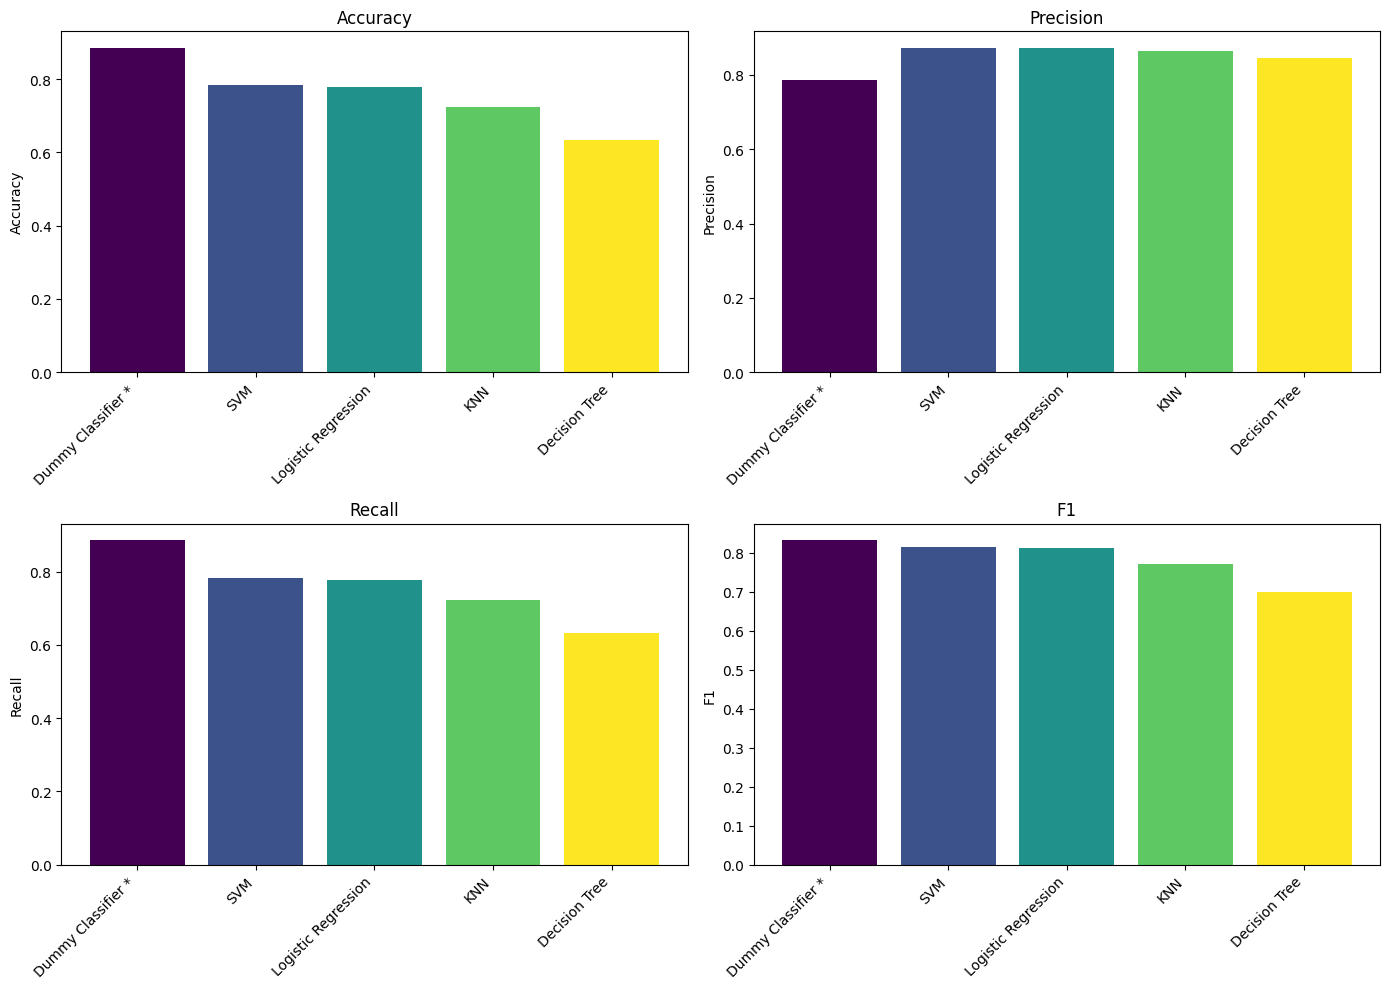

,Model Name,Accuracy,Precision,Recall,F1,Best Parameters,Training Time (seconds),Selection Time (seconds)
0,Dummy Classifier *,0.886502,0.785885,0.886502,0.833167,{},0.000621,0.033812
4,SVM,0.783200,0.873516,0.783200,0.815078,{},1.567523,4.293560
1,Logistic Regression,0.778708,0.871889,0.778708,0.811617,{},0.353971,2.615486
2,KNN,0.724084,0.863975,0.724084,0.771066,{},0.046187,1.111028
3,Decision Tree,0.633528,0.845529,0.633528,0.700400,{},0.080661,0.711891


In [85]:
evaluate_models(best_simple_models_results_undersampled, X_test, y_test, model_type='classification', scoring='accuracy', baseline_model=baseline_model)

##### Findings
- The accuracy of the models drop significantly when undersampling the majority class, out performed by Dummy Classifier.
- Not a viable solution to improve the model's performance.

#### Experiment 3: Hyperparameter tuning and grid search

In [69]:

#Setup hyperparameter tuned models
hyperparameter_tuned_logistic_regression_model = ModelWrapper(
    LogisticRegression(), #Increase max_iter to avoid convergence warnings
    {'model__penalty': ['l1', 'l2'], 'model__C': [0.001, 0.01, 0.1], 'model__max_iter': [1000, 10000]}, 
    'Logistic Regression'
)
hyperparameter_tuned_knn_model = ModelWrapper(
    KNeighborsClassifier(), 
    {'model__n_neighbors': [3, 5, 7], 'model__weights': ['uniform', 'distance']}, 
    'KNN'
)
hyperparameter_tuned_decision_tree_model = ModelWrapper(
    DecisionTreeClassifier(), 
    {'model__max_depth': [3, 5, 7], 'model__min_samples_split': [2, 5, 10]}, 
    'Decision Tree'
)
hyperparameter_tuned_svm_model = ModelWrapper(
    SVC(), 
    {'model__C': [0.001, 0.01, 0.1], 'model__kernel': ['linear', 'rbf']}, 
    'SVM'
)

hyperparameter_tuned_models_list = [hyperparameter_tuned_logistic_regression_model, hyperparameter_tuned_knn_model, hyperparameter_tuned_decision_tree_model, hyperparameter_tuned_svm_model]


In [70]:
#Train hyperparameter tuned models

best_hyperparameter_tuned_models_results = train_models(
    hyperparameter_tuned_models_list, 
    simple_pipeline,   
    X_train, 
    y_train, 
    model_type='classification', 
    scoring='accuracy', 
    training_time=True,
)


Training Logistic Regression model...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 2/5] END model__C=0.001, model__max_iter=1000, model__penalty=l1;, score=nan total time=   0.1s
[CV 1/5] END model__C=0.001, model__max_iter=1000, model__penalty=l1;, score=nan total time=   0.1s
[CV 4/5] END model__C=0.001, model__max_iter=1000, model__penalty=l1;, score=nan total time=   0.1s
[CV 3/5] END model__C=0.001, model__max_iter=1000, model__penalty=l1;, score=nan total time=   0.1s
[CV 5/5] END model__C=0.001, model__max_iter=1000, model__penalty=l1;, score=nan total time=   0.1s
[CV 1/5] END model__C=0.001, model__max_iter=1000, model__penalty=l2;, score=0.901 total time=   0.1s
[CV 2/5] END model__C=0.001, model__max_iter=1000, model__penalty=l2;, score=0.898 total time=   0.1s
[CV 1/5] END model__C=0.001, model__max_iter=10000, model__penalty=l1;, score=nan total time=   0.1s
[CV 3/5] END model__C=0.001, model__max_iter=1000, model__penalty=l2;, score=0.900 total time=  

+----+-----------------------+------------+-------------+----------+----------+--------------------------------------------------------------------+---------------------------+----------------------------+
|    | Model Name            |   Accuracy |   Precision |   Recall |       F1 | Best Parameters                                                    |   Training Time (seconds) |   Selection Time (seconds) |
+====+=======================+============+=============+==========+==========+====================================================================+===========================+============================+
|  1 | Logistic Regression * |   0.897669 |    0.878036 | 0.897669 | 0.873966 | {'model__C': 0.1, 'model__max_iter': 1000, 'model__penalty': 'l2'} |                0.849529   |                  2.53599   |
+----+-----------------------+------------+-------------+----------+----------+--------------------------------------------------------------------+---------------------------+

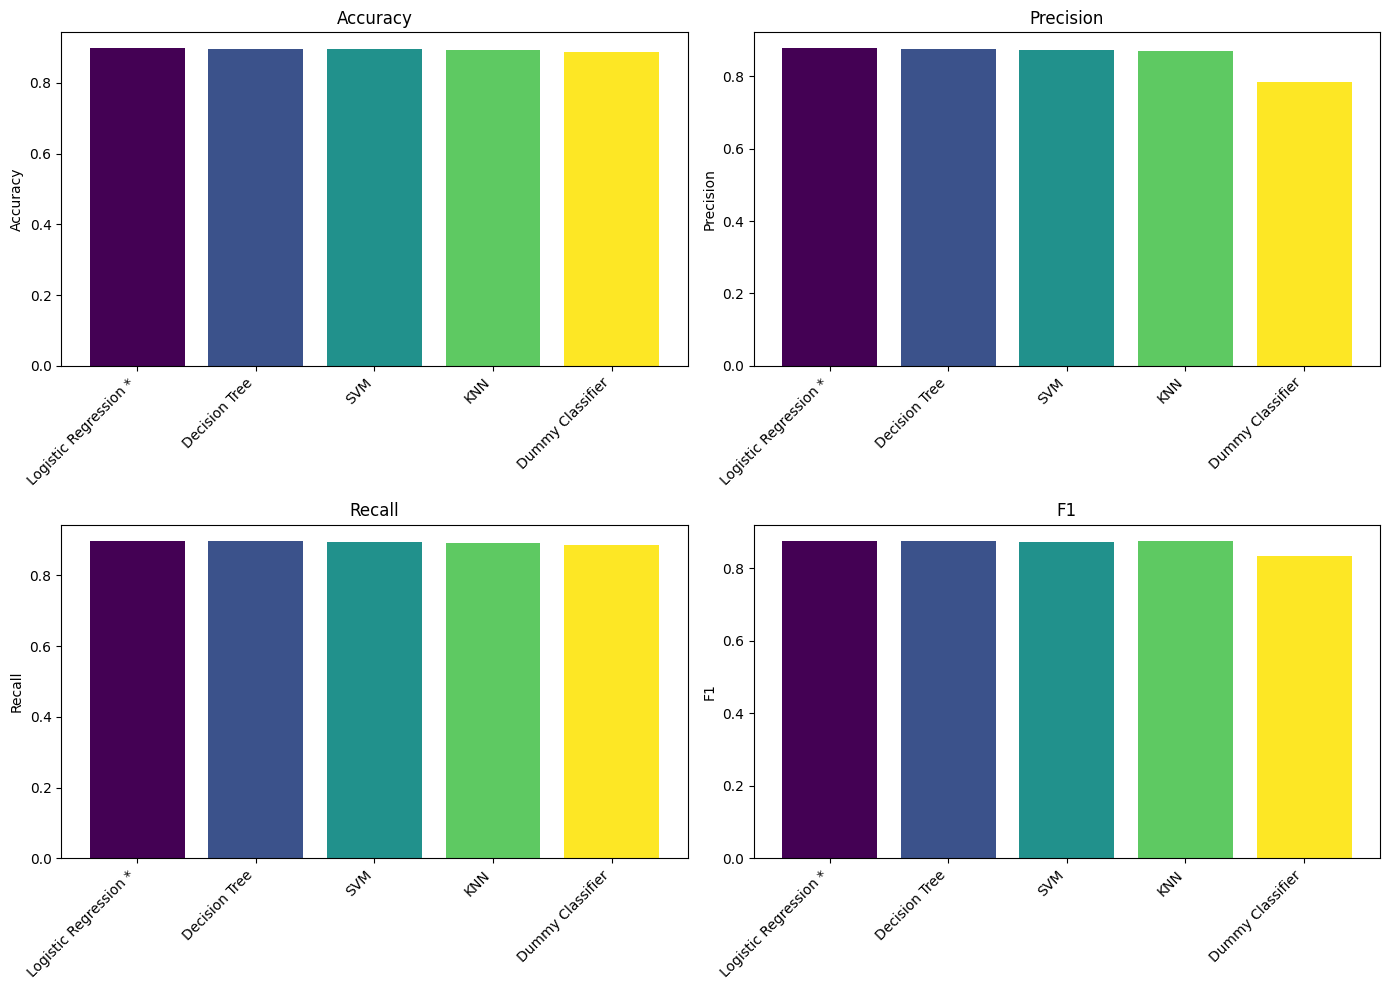

,Model Name,Accuracy,Precision,Recall,F1,Best Parameters,Training Time (seconds),Selection Time (seconds)
1,Logistic Regression *,0.897669,0.878036,0.897669,0.873966,"{'model__C': 0.1, 'model__max_iter': 1000, 'mo...",0.849529,2.535994
3,Decision Tree,0.896455,0.875741,0.896455,0.874880,"{'model__max_depth': 5, 'model__min_samples_sp...",0.085832,1.091258
4,SVM,0.894756,0.872293,0.894756,0.870619,"{'model__C': 0.001, 'model__kernel': 'linear'}",5.839812,68.095348
2,KNN,0.891600,0.870906,0.891600,0.875430,"{'model__n_neighbors': 7, 'model__weights': 'u...",0.041106,4.339629
0,Dummy Classifier,0.886502,0.785885,0.886502,0.833167,{},0.000621,0.033812


In [86]:
#Evaluate hyperparameter tuned models
evaluate_models(best_hyperparameter_tuned_models_results, X_test, y_test, model_type='classification', scoring='accuracy', baseline_model=baseline_model)

##### Findings
- The accuracy of the models improve when hyperparameter tuned, but are no better than the simple models.
- The best model is the Logistic Regression model.


#### Experiment 4: Adjust add polynomial features

In [72]:
from sklearn.preprocessing import PolynomialFeatures


pipeline_polynomial_features = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression()) #Placeholder for the model
])

In [73]:
#Train Polynomial Features Pipeline
best_polynomial_features_results = train_models(
    simple_models_list, 
    pipeline_polynomial_features, 
    X_train, 
    y_train, 
    model_type='classification', 
    scoring='accuracy', 
    training_time=True,
    verbose=3
)

Training Logistic Regression model...
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 3/5] END ..................................., score=0.899 total time=  21.0s
[CV 1/5] END ..................................., score=0.902 total time=  21.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[CV 2/5] END ..................................., score=0.896 total time=  21.4s
[CV 4/5] END ..................................., score=0.900 total time=  21.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..................................., score=0.902 total time=  21.0s
Training KNN model...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 5/5] END ..................................., score=0.894 total time=   8.3s
[CV 2/5] END ..................................., score=0.891 total time=   8.3s
[CV 1/5] END ..................................., score=0.888 total time=   8.3s
[CV 3/5] END ..................................., score=0.891 total time=   8.3s
[CV 4/5] END ..................................., score=0.892 total time=   8.4s
Training Decision Tree model...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.837 total time=   4.7s
[CV 3/5] END ..................................., score=0.840 total time=   5.1s
[CV 2/5] END ..................................., score=0.838 total time=   5.1s
[CV 5/5] END ..................................., score=0.842 total time=   5.1s
[CV 4/5] END .....

+----+---------------------+------------+-------------+----------+----------+-------------------+---------------------------+----------------------------+
|    | Model Name          |   Accuracy |   Precision |   Recall |       F1 | Best Parameters   |   Training Time (seconds) |   Selection Time (seconds) |
+====+=====================+============+=============+==========+==========+===================+===========================+============================+
|  4 | SVM *               |   0.897427 |    0.878445 | 0.897427 | 0.870723 | {}                |              448.416      |                882.038     |
+----+---------------------+------------+-------------+----------+----------+-------------------+---------------------------+----------------------------+
|  1 | Logistic Regression |   0.894635 |    0.873303 | 0.894635 | 0.875123 | {}                |               23.0941     |                 48.6584    |
+----+---------------------+------------+-------------+----------+----

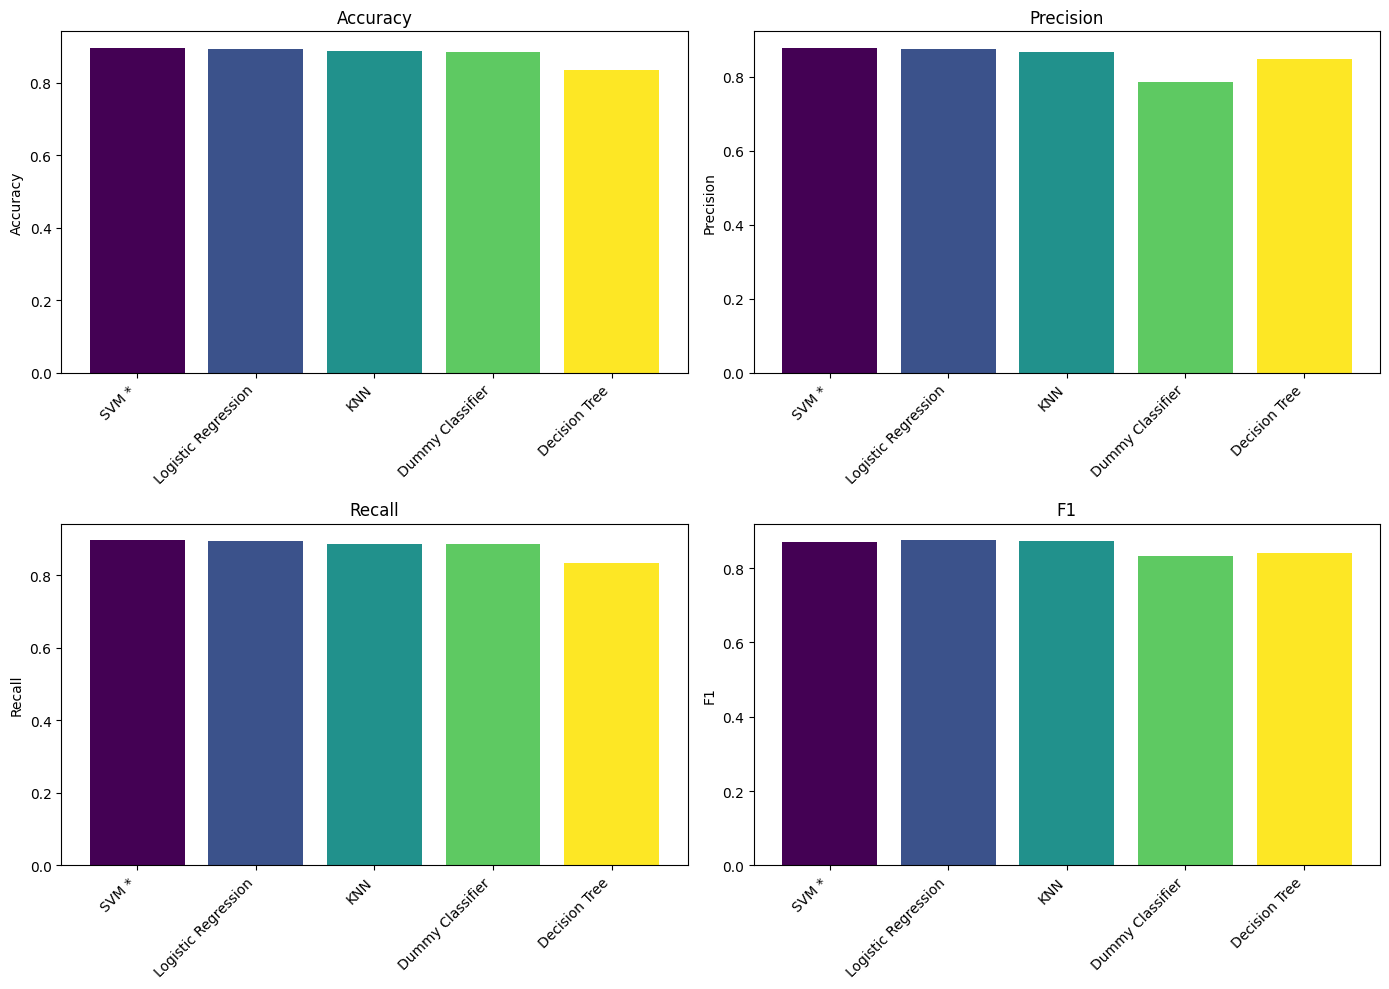

,Model Name,Accuracy,Precision,Recall,F1,Best Parameters,Training Time (seconds),Selection Time (seconds)
4,SVM *,0.897427,0.878445,0.897427,0.870723,{},448.416425,882.038006
1,Logistic Regression,0.894635,0.873303,0.894635,0.875123,{},23.094051,48.658365
2,KNN,0.887837,0.867146,0.887837,0.872975,{},0.214388,9.514801
0,Dummy Classifier,0.886502,0.785885,0.886502,0.833167,{},0.000621,0.033812
3,Decision Tree,0.835276,0.846887,0.835276,0.840760,{},4.948862,10.325930


In [87]:
#Evaluate Polynomial Features Pipeline
evaluate_models(best_polynomial_features_results, X_test, y_test, model_type='classification', scoring='accuracy', baseline_model=baseline_model)  

##### Experiment 5: Simple Models with F1 Score 



In [88]:
best_simple_models_results_f1 = train_models(simple_models_list, simple_pipeline, X_train, y_train, model_type='classification', scoring='F1', training_time=True, verbose=3)



Training Logistic Regression model...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..................................., score=0.353 total time=   0.5s
[CV 4/5] END ..................................., score=0.339 total time=   0.5s
[CV 2/5] END ..................................., score=0.324 total time=   0.5s
[CV 3/5] END ..................................., score=0.338 total time=   0.6s
[CV 5/5] END ..................................., score=0.327 total time=   0.6s
Training KNN model...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 5/5] END ..................................., score=0.385 total time=   0.8s
[CV 4/5] END ..................................., score=0.360 total time=   0.8s
[CV 2/5] END ..................................., score=0.366 total time=   0.8s
[CV 3/5] END ..................................., score=0.369 total time=   0.8s
[CV 1/5] END ..................................., score=0.371 total time=   0.8s
Training Dec

+----+-----------------------+------------+-------------+----------+----------+-------------------+---------------------------+----------------------------+
|    | Model Name            |   Accuracy |   Precision |   Recall |       F1 | Best Parameters   |   Training Time (seconds) |   Selection Time (seconds) |
+====+=======================+============+=============+==========+==========+===================+===========================+============================+
|  1 | Logistic Regression * |   0.896941 |    0.876552 | 0.896941 | 0.873655 | {}                |                1.38818    |                  4.18902   |
+----+-----------------------+------------+-------------+----------+----------+-------------------+---------------------------+----------------------------+
|  2 | KNN                   |   0.887715 |    0.867385 | 0.887715 | 0.873253 | {}                |                0.0423918  |                  1.42999   |
+----+-----------------------+------------+-------------+-

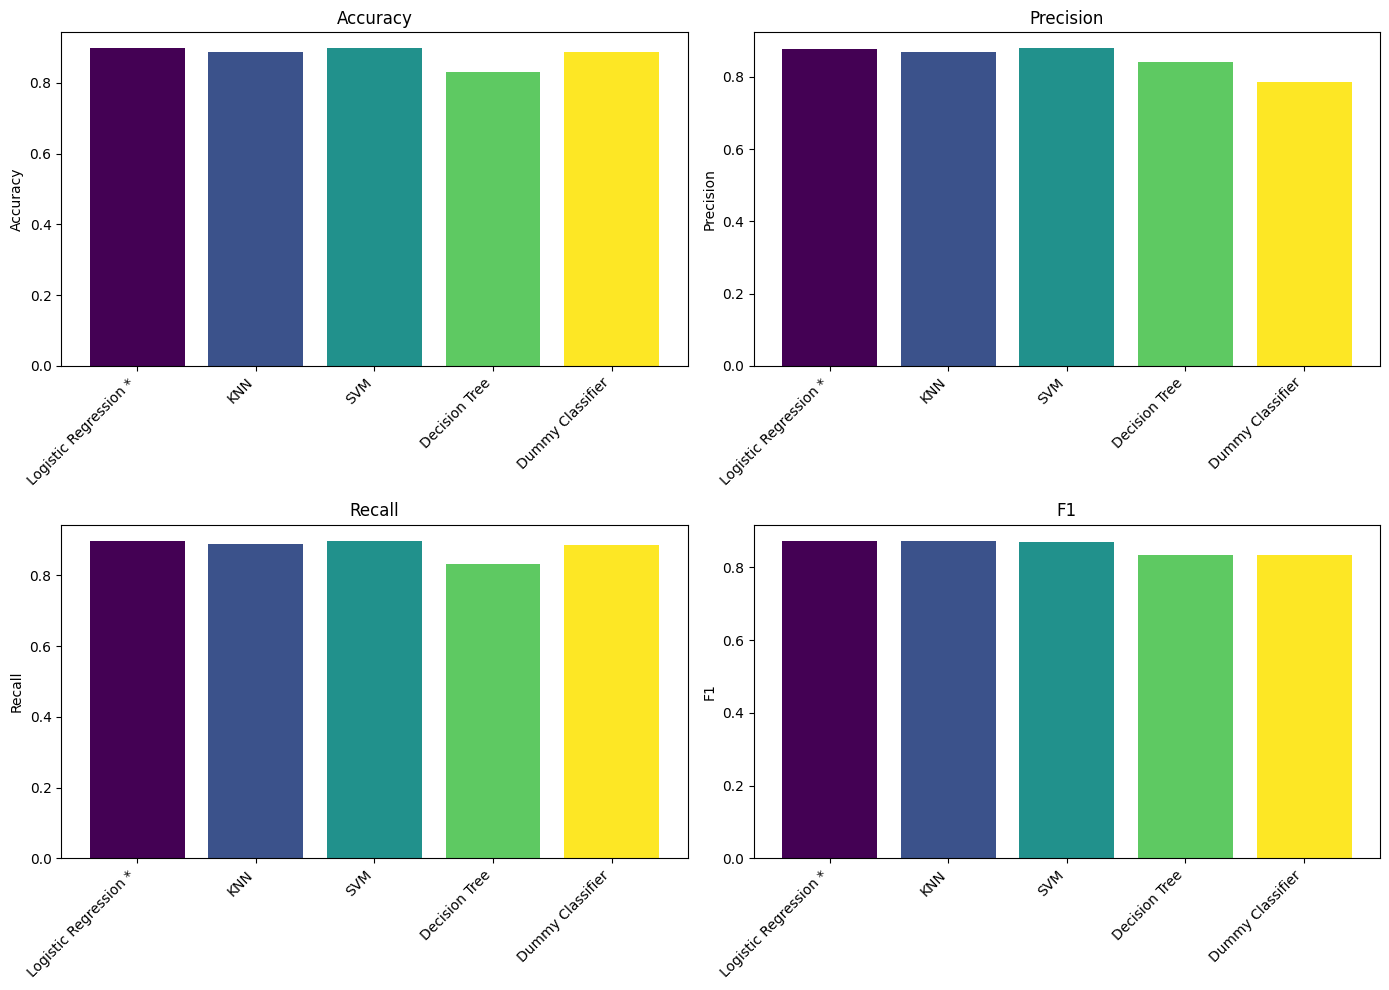

,Model Name,Accuracy,Precision,Recall,F1,Best Parameters,Training Time (seconds),Selection Time (seconds)
1,Logistic Regression *,0.896941,0.876552,0.896941,0.873655,{},1.388184,4.189023
2,KNN,0.887715,0.867385,0.887715,0.873253,{},0.042392,1.429986
4,SVM,0.897669,0.878993,0.897669,0.871029,{},26.057265,49.528114
3,Decision Tree,0.830541,0.840307,0.830541,0.835220,{},0.184386,0.925511
0,Dummy Classifier,0.886502,0.785885,0.886502,0.833167,{},0.000621,0.033812


In [89]:
#Evaluate Simple Models with F1 Score
evaluate_models(best_simple_models_results_f1, X_test, y_test, model_type='classification', scoring='F1', baseline_model=baseline_model)


In [90]:
#Train Hyperparameter Tuned Models with F1 Score
best_hyperparameter_tuned_models_results_f1 = train_models(hyperparameter_tuned_models_list, simple_pipeline, X_train, y_train, model_type='classification', scoring='F1', training_time=True, verbose=3)


Training Logistic Regression model...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 2/5] END model__C=0.001, model__max_iter=1000, model__penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END model__C=0.001, model__max_iter=1000, model__penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END model__C=0.001, model__max_iter=1000, model__penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END model__C=0.001, model__max_iter=1000, model__penalty=l1;, score=nan total time=   0.1s
[CV 3/5] END model__C=0.001, model__max_iter=1000, model__penalty=l1;, score=nan total time=   0.1s
[CV 1/5] END model__C=0.001, model__max_iter=1000, model__penalty=l2;, score=0.310 total time=   0.1s
[CV 2/5] END model__C=0.001, model__max_iter=1000, model__penalty=l2;, score=0.289 total time=   0.1s
[CV 3/5] END model__C=0.001, model__max_iter=1000, model__penalty=l2;, score=0.309 total time=   0.1s
[CV 1/5] END model__C=0.001, model__max_iter=10000, model__penalty=l1;, score=nan total time=  

+----+---------------------+------------+-------------+----------+----------+--------------------------------------------------------------------+---------------------------+----------------------------+
|    | Model Name          |   Accuracy |   Precision |   Recall |       F1 | Best Parameters                                                    |   Training Time (seconds) |   Selection Time (seconds) |
+====+=====================+============+=============+==========+==========+====================================================================+===========================+============================+
|  3 | Decision Tree *     |   0.89864  |    0.879778 | 0.89864  | 0.879106 | {'model__max_depth': 7, 'model__min_samples_split': 10}            |                0.104421   |                  1.10319   |
+----+---------------------+------------+-------------+----------+----------+--------------------------------------------------------------------+---------------------------+----------

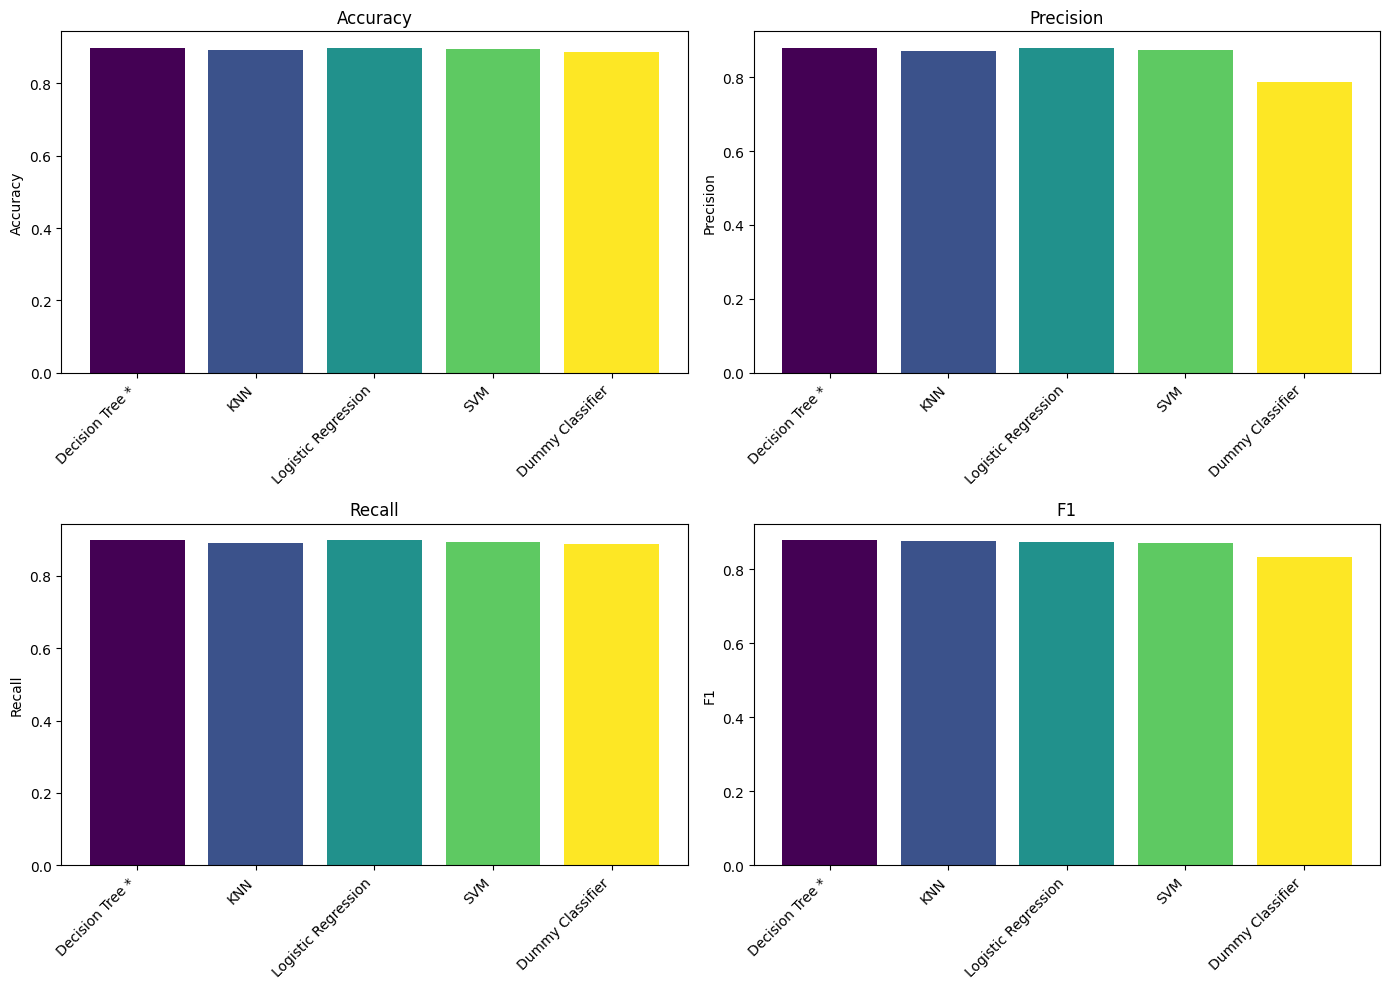

,Model Name,Accuracy,Precision,Recall,F1,Best Parameters,Training Time (seconds),Selection Time (seconds)
3,Decision Tree *,0.898640,0.879778,0.898640,0.879106,"{'model__max_depth': 7, 'model__min_samples_sp...",0.104421,1.103186
2,KNN,0.891600,0.870906,0.891600,0.875430,"{'model__n_neighbors': 7, 'model__weights': 'u...",0.042261,4.026433
1,Logistic Regression,0.897669,0.878036,0.897669,0.873966,"{'model__C': 0.1, 'model__max_iter': 1000, 'mo...",0.710520,4.687832
4,SVM,0.894756,0.872293,0.894756,0.870619,"{'model__C': 0.001, 'model__kernel': 'linear'}",6.128760,67.013472
0,Dummy Classifier,0.886502,0.785885,0.886502,0.833167,{},0.000621,0.033812


In [91]:

#Evaluate Hyperparameter Tuned Models with F1 Score
evaluate_models(best_hyperparameter_tuned_models_results_f1, X_test, y_test, model_type='classification', scoring='F1', baseline_model=baseline_model)


##### Findings
- The F1 score of the models improve when hyperparameter tuned
- The best model is the Decision Tree model.


## Summary of Model Evaluation and Selection

In this project, I evaluated multiple machine learning models to predict whether a client would subscribe to a term deposit, focusing on **logistic regression, decision trees, KNN, SVM**, and a **dummy classifier** as the baseline. The performance of the models was measured using various metrics, including **accuracy, precision, recall, and F1-score**. 

---

### Evaluation Results Overview

1. **Decision Tree** achieved the highest **F1-score** (0.8791), indicating a good balance between precision and recall, followed closely by KNN (0.8754) and Logistic Regression (0.8739).
2. **KNN** demonstrated strong precision (0.8709) and recall (0.8916) but required more **model selection time**.
3. **Logistic Regression** showed consistent performance across all metrics, with good precision (0.878) and recall (0.8977).
4. **SVM** had the longest **training and selection time**, making it less practical for this problem, despite having competitive performance.
5. **Dummy Classifier** provided the baseline performance with an **F1-score of 0.8331**, showing that more advanced models offer meaningful improvements.

---

### Why I Used F1-Score for Model Selection

In this **bank marketing campaign context**, the goal is to **identify as many potential customers as possible (true positives)** while minimizing **false positives** (contacting uninterested clients). The **F1-score** was chosen as the primary evaluation metric for the following reasons:

1. **Class Imbalance**:
   - The dataset likely has an **imbalance between positive and negative outcomes** (i.e., more "no" than "yes" responses). Metrics like **accuracy** can be misleading in such cases, as predicting only the majority class can still yield high accuracy.

2. **Balance Between Precision and Recall**:
   - **Precision** ensures we don’t waste resources contacting uninterested clients.
   - **Recall** ensures we identify as many potential clients as possible. 
   - The **F1-score** provides a **harmonious balance between these two metrics**, making it ideal for this campaign.

3. **Business Impact**:
   - Failing to identify a potential customer (false negatives) or contacting uninterested clients (false positives) both have business costs. The **F1-score** optimizes for both, ensuring that the model chosen has practical value for the campaign.

---

### Optimal Model Selection

Based on the F1-score, the **Decision Tree** model was selected as the optimal model. Although other models such as KNN and Logistic Regression also performed well, the Decision Tree was chosen because:
- It **achieved the highest F1-score (0.8791)**.
- It had a relatively fast **training time** (0.10 seconds), making it more efficient for deployment.
- The **best parameters** (`max_depth=7`, `min_samples_split=2`) ensure the model is not overly complex but still captures essential patterns in the data.

---

### Next Steps

- **Further Hyperparameter Tuning**: While the decision tree performed well, further fine-tuning could yield additional improvements.
- **Ensemble Methods**: Techniques like **random forests or boosting** could be explored to see if they provide a performance boost.
- **Business Insights**: The model will be used to focus the marketing campaign on high-potential clients, ensuring better **resource allocation and improved conversion rates**.

---

This summary highlights the **importance of using F1-score** in evaluating models for imbalanced datasets, ensuring a fair balance between business needs and model performance.
